In [31]:
import numpy as np
import os
from tensorflow.keras.applications import ResNet50
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
import random

import matplotlib.pyplot as plt

In [32]:
base_path = "C:/Users/SIDDHARTH/desktop/ML and Data Science/Transfer Learning/Dataset/Images"
dirs = os.listdir("C:/Users/SIDDHARTH/desktop/ML and Data Science/Transfer Learning/Dataset/Images")

In [33]:
print(dirs)

['cats', 'dogs', 'horses', 'humans']


In [34]:
folder_path = ""

In [35]:
image_data = []


In [36]:
labels = []

In [37]:
label_dict = {'cats':0,'dogs':1,'horses':2,'humans':3}

In [38]:
for ix in dirs:
    path = os.path.join(base_path,ix)
    img_data = os.listdir(path)
    for im in img_data:
        img = image.load_img(os.path.join(path,im),target_size=(224,224))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [39]:
print(len(image_data), len(labels))

808 808


In [40]:
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

In [41]:
X_train = np.array(image_data)
Y_train = np.array(labels)

print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808,)


In [42]:
Y_train = np_utils.to_categorical(Y_train)
print(X_train.shape,Y_train.shape)

(808, 224, 224, 3) (808, 4)


In [43]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

94781440/94765736 [==============================] - 51s 1us/step


In [44]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [46]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(4,activation='softmax')(d1)

model_new = Model(inputs=model.input, outputs= fc2)
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [47]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [48]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x000002A628263DF0>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x000002A629C51D00>
2 <keras.layers.convolutional.Conv2D object at 0x000002A6486E90D0>
3 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002A6486E90A0>
4 <keras.layers.core.activation.Activation object at 0x000002A6487063D0>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x000002A648706F40>
6 <keras.layers.pooling.MaxPooling2D object at 0x000002A6487BCB20>
7 <keras.layers.convolutional.Conv2D object at 0x000002A6487BCBE0>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002A6487CEAF0>
9 <keras.layers.core.activation.Activation object at 0x000002A6487E5550>
10 <keras.layers.convolutional.Conv2D object at 0x000002A6487BC340>
11 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000002A6487E51F0>
12 <keras.layers.core.activation.Activation object at 0x000002A6487F44

In [49]:
for ix in range(169):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [50]:
hist = model_new.fit(X_train,Y_train,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 5,
                    validation_split=0.20
                    )

Epoch 1/5
41/41 [==============================] - 75s 2s/step - loss: 1.3166 - accuracy: 0.4628 - val_loss: 0.4890 - val_accuracy: 0.8704
Epoch 2/5
41/41 [==============================] - 72s 2s/step - loss: 0.5645 - accuracy: 0.7972 - val_loss: 0.2729 - val_accuracy: 0.9321
Epoch 3/5
41/41 [==============================] - 74s 2s/step - loss: 0.3367 - accuracy: 0.8824 - val_loss: 0.2143 - val_accuracy: 0.9383
Epoch 4/5
41/41 [==============================] - 66s 2s/step - loss: 0.2854 - accuracy: 0.9102 - val_loss: 0.1804 - val_accuracy: 0.9506
Epoch 5/5
41/41 [==============================] - 66s 2s/step - loss: 0.2113 - accuracy: 0.9303 - val_loss: 0.1610 - val_accuracy: 0.9506


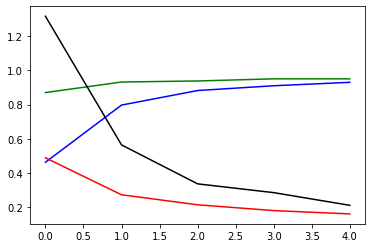

In [52]:
plt.figure(0)
plt.plot(hist.history['accuracy'],'b')
plt.plot(hist.history['val_accuracy'],'g')
plt.plot(hist.history['loss'],'black')
plt.plot(hist.history['val_loss'],'red')
plt.show()